In [1]:
import pyLIMA

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import csv

from pyLIMA.fits import DE_fit
from pyLIMA.fits import TRF_fit
from pyLIMA.models import PSPL_model
from pyLIMA.models import USBL_model, pyLIMA_fancy_parameters
from pyLIMA.outputs import pyLIMA_plots

from pyLIMA import event
from pyLIMA import telescopes

In [3]:
your_event = event.Event(ra=262.75616,dec=-21.40123)
your_event.name = 'Gaia21bsg'

In [4]:
data_1 = np.loadtxt('data/star_20957_Gaia21bsg_fs01_ip_reduced.dat')
telescope_1 = telescopes.Telescope(name='Gaia_20957_i',
                                  camera_filter = 'I',
                                  light_curve = data_1.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

data_2 = np.loadtxt('data/star_50085_Gaia21bsg_gp_reduced.dat')
telescope_2 = telescopes.Telescope(name='Gaia__50085_g',
                                  camera_filter = 'G',
                                  light_curve = data_2.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

data_3 = np.loadtxt('data/star_79874_Gaia21bsg_ip_reduced.dat')
telescope_3 = telescopes.Telescope(name='Gaia_79874_i',
                                  camera_filter = 'I',
                                  light_curve = data_3.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [ ]:
#plt.plot(data_3[:,0],data_3[:,1])

In [5]:
data_4 = np.loadtxt('data/atlas_c_filter.dat')
data_4[:,0] = data_4[:,0] + 2.4e6
telescope_4 = telescopes.Telescope(name='ATLAS_c',
                                  camera_filter = 'C',
                                  light_curve = data_4.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [6]:
data_5 = np.loadtxt('data/atlas_o_filter.dat')
data_5[:,0] = data_5[:,0] + 2.4e6
telescope_5 = telescopes.Telescope(name='ATLAS_o',
                                  camera_filter = 'O',
                                  light_curve = data_5.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [ ]:
#plt.plot(data_4[:,0],data_4[:,1])

In [7]:
data_6 = np.loadtxt('data/ztf_gaiabsg21_reduced.dat')
data_6[:,0] = data_6[:,0] + 2.4e6
telescope_6 = telescopes.Telescope(name='ZTF_r',
                                  camera_filter = 'R',
                                  light_curve = data_6.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [ ]:
#plt.plot(data_5[:,0],data_5[:,1])

# object id found via ztf: 281216400001763

In [8]:
your_event.telescopes.append(telescope_1)
your_event.telescopes.append(telescope_2)
your_event.telescopes.append(telescope_3)
your_event.telescopes.append(telescope_4)
your_event.telescopes.append(telescope_5)
your_event.telescopes.append(telescope_6)

In [9]:
your_event.find_survey('Gaia')

In [10]:
your_event.check_event()

check_event  : Everything looks fine...


In [11]:
from pyLIMA.models import PSPL_model
pspl = PSPL_model.PSPLmodel(your_event)

In [12]:
from pyLIMA.fits import DE_fit

In [13]:
my_fit = DE_fit.DEfit(pspl)

In [14]:
my_fit.fit_parameters

OrderedDict([('t0', [0, (2458246.4171181, 2460119.920427)]),
             ('u0', [1, (0.0, 1.0)]),
             ('tE', [2, (0.1, 500)])])

In [15]:
my_fit.fit()

DE converge to objective function : f(x) =  85794.2773147185
DE converge to parameters : =  ['2459353.8724623895' '0.9997870254154203' '1.1244920416965272']
fit  : Differential Evolution fit SUCCESS
best_model: [2.45935387e+06 9.99787025e-01 1.12449204e+00] -ln(likelihood) 85794.2773147185


In [16]:
my_fit.fit_results

{'best_model': array([2.45935387e+06, 9.99787025e-01, 1.12449204e+00]),
 '-(ln_likelihood)': 85794.2773147185,
 'fit_time': 7.68450403213501,
 'DE_population': array([[ 2.45987961e+06,  9.73343278e-01,  1.17865819e+02, ...,
          5.17959541e+01,  1.24332576e+03,  1.64606528e+05],
        [ 2.45974578e+06,  5.97406885e-01,  8.13663236e+01, ...,
          1.49965932e-01,  1.29563408e+03,  1.66083392e+05],
        [ 2.46004475e+06,  4.20667022e-01,  2.33081017e+02, ...,
          2.87494023e+02,  1.00321078e+03,  1.64612111e+05],
        ...,
        [ 2.45935386e+06,  4.43967398e-01,  1.12662209e+00, ...,
          2.78519800e+05, -2.77230349e+05,  9.20189310e+04],
        [ 2.45935387e+06,  9.98067071e-01,  1.13356270e+00, ...,
          2.97131285e+05, -2.95841862e+05,  8.57964661e+04],
        [ 2.45935387e+06,  9.98092002e-01,  1.12064837e+00, ...,
          3.07389866e+05, -3.06100416e+05,  8.57961402e+04]])}

In [17]:
my_fit.fit_results['best_model']

array([2.45935387e+06, 9.99787025e-01, 1.12449204e+00])

In [18]:
my_fit.fit_parameters.keys()

odict_keys(['t0', 'u0', 'tE'])

<IPython.core.display.Javascript object>


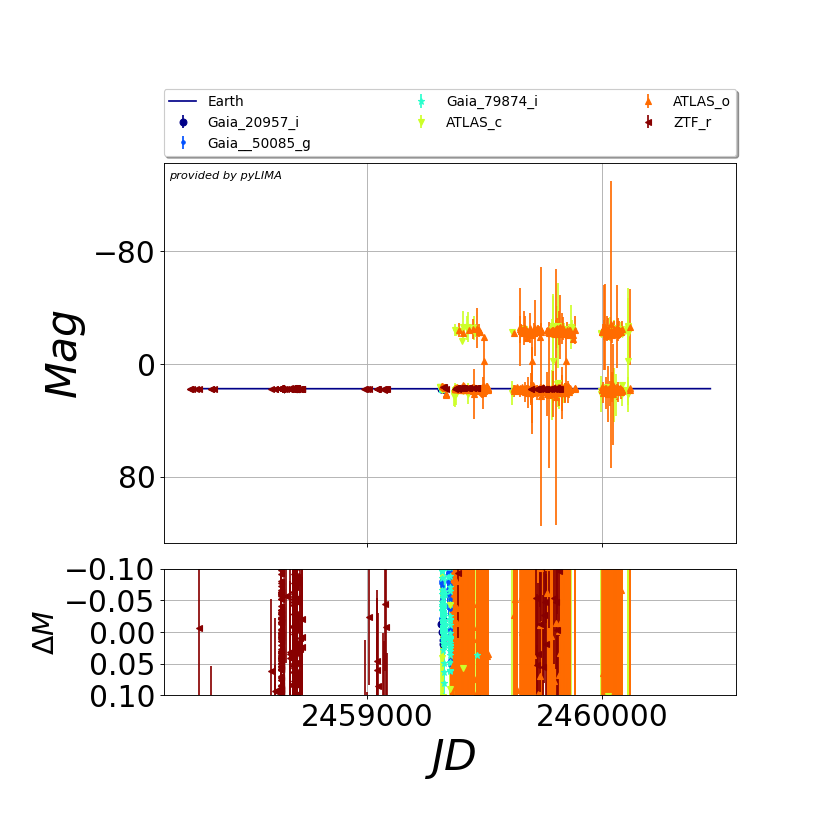

/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/outputs/pyLIMA_plots.py:1017: RuntimeWarning: invalid value encountered in log10
  np.log10(ref_source * magni + ref_blend)
/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/outputs/pyLIMA_plots.py:1112: RuntimeWarning: invalid value encountered in log10
  np.log10(model_flux)


In [19]:
from pyLIMA.outputs import pyLIMA_plots
pyLIMA_plots.plot_lightcurves(pspl,my_fit.fit_results['best_model'])
plt.show()

In [20]:
from pyLIMA.fits import LM_fit

In [21]:
my_fit2 = LM_fit.LMfit(pspl)

In [22]:
my_fit2.fit()

initial_guess  : Initial parameters guess SUCCESS
Using guess:  [2459352.0284369695, 1.0, 25.965066770557314, 8967.818203053135, 0.0, 555.7292324338752, 0.0, 2883.891295418017, 0.0, 8.542795299048404e+20, 10008.095480357031, 32378.150413743424, -31669.6419015939, 5764.557824945484, 0.0]
fit  : Levenberg-Marquardt fit SUCCESS
best_model: [2459353.8815725544, 1.7247674885613722, -0.7803054916170219, -52392.708170054146, 60925.295978938266, 3086.1803269116476, -2813.5147750741744, 17714.026625472834, -16466.568017189813, 38283.884959265306, -37151.16596797758, 29282.583359313878, -28236.97573327269, 19629.136065511502, -18333.440232801346]  chi2: 130610.68998080058


In [23]:
my_fit2.fit_results

{'best_model': [2459353.8815725544,
  1.7247674885613722,
  -0.7803054916170219,
  -52392.708170054146,
  60925.295978938266,
  3086.1803269116476,
  -2813.5147750741744,
  17714.026625472834,
  -16466.568017189813,
  38283.884959265306,
  -37151.16596797758,
  29282.583359313878,
  -28236.97573327269,
  19629.136065511502,
  -18333.440232801346],
 'chi2': 130610.68998080058,
 'fit_time': 0.2656567096710205,
 'covariance_matrix': array([[ 1.22643034e-03,  8.61611948e-04, -9.13799551e-05,
          6.25089160e-06,  5.93193656e-06,  4.84699627e+00,
         -4.84923882e+00,  2.78912030e+01, -2.79096033e+01,
          6.91683613e+01, -6.91640128e+01, -9.86348487e+01,
          9.86558496e+01, -3.64682879e-01,  3.64622135e-01],
        [ 8.61611948e-04,  4.63441655e-01,  1.53339882e-01,
         -1.57338085e-02, -1.58571495e-02,  2.25826241e+03,
         -2.25819300e+03,  1.29654636e+04, -1.29651763e+04,
          2.56838156e+04, -2.56785530e+04, -3.81011468e+04,
          3.81164221e+04, 

In [24]:
my_fit2.fit_results['best_model']

[2459353.8815725544,
 1.7247674885613722,
 -0.7803054916170219,
 -52392.708170054146,
 60925.295978938266,
 3086.1803269116476,
 -2813.5147750741744,
 17714.026625472834,
 -16466.568017189813,
 38283.884959265306,
 -37151.16596797758,
 29282.583359313878,
 -28236.97573327269,
 19629.136065511502,
 -18333.440232801346]

In [25]:
my_fit2.fit_parameters.keys()

odict_keys(['t0', 'u0', 'tE', 'fsource_Gaia_20957_i', 'fblend_Gaia_20957_i', 'fsource_Gaia__50085_g', 'fblend_Gaia__50085_g', 'fsource_Gaia_79874_i', 'fblend_Gaia_79874_i', 'fsource_ATLAS_c', 'fblend_ATLAS_c', 'fsource_ATLAS_o', 'fblend_ATLAS_o', 'fsource_ZTF_r', 'fblend_ZTF_r'])

<IPython.core.display.Javascript object>


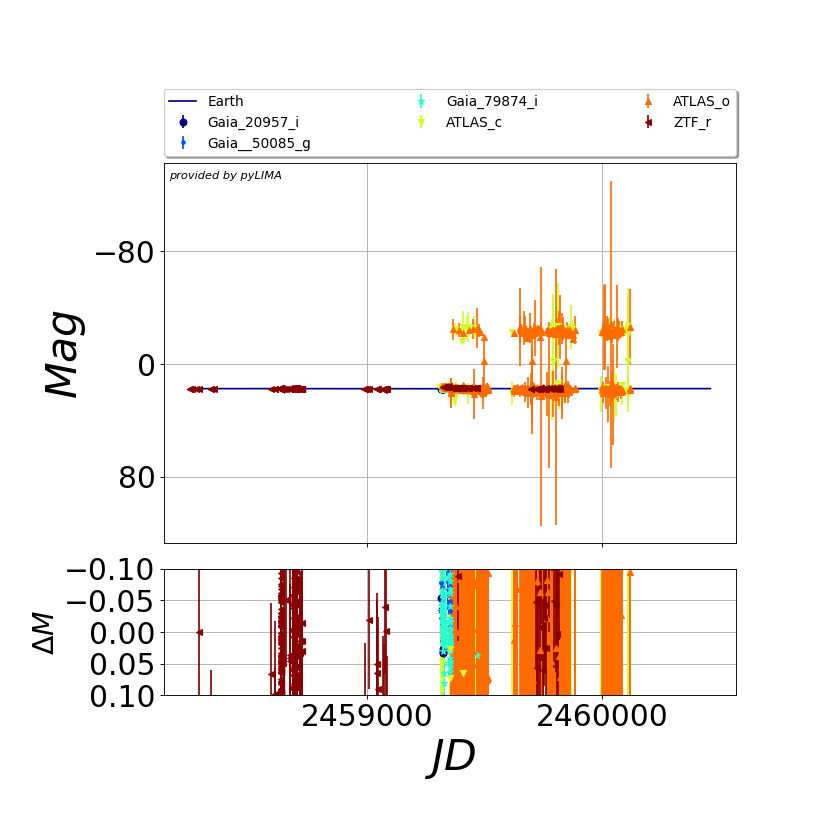

In [26]:
pyLIMA_plots.plot_lightcurves(pspl,my_fit2.fit_results['best_model'])
plt.savefig('output1.png')
plt.show()